
The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.



## Get the Data



In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('bank_note_data.csv')

In [3]:
data.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,7122.00000,7122.000000,7122.000000,7122.000000,7122.000000
mean,0.27601,1.636192,1.595947,-1.162797,0.478658
std,2.88056,5.975146,4.634517,2.030254,0.499579
min,-7.04210,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.99220,-2.584500,-1.646875,-2.260550,0.000000
50%,0.32920,1.967900,0.615345,-0.599580,0.000000
75%,2.67990,6.675500,3.489600,0.350840,1.000000
max,6.82480,12.951600,17.927400,2.449500,1.000000


In [4]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA



In [5]:
import seaborn as sns
%matplotlib inline

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

<AxesSubplot:xlabel='Class', ylabel='count'>

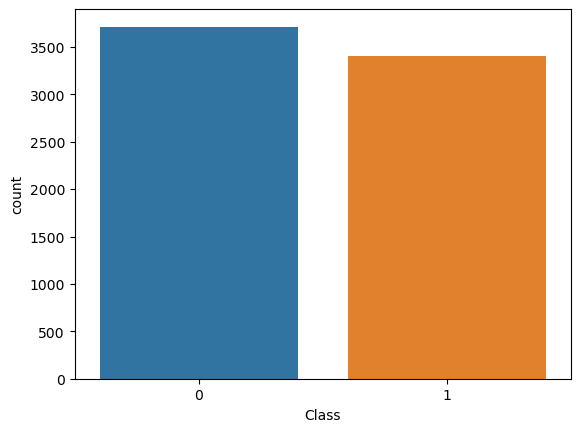

In [6]:
sns.countplot(x='Class',data=data)

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

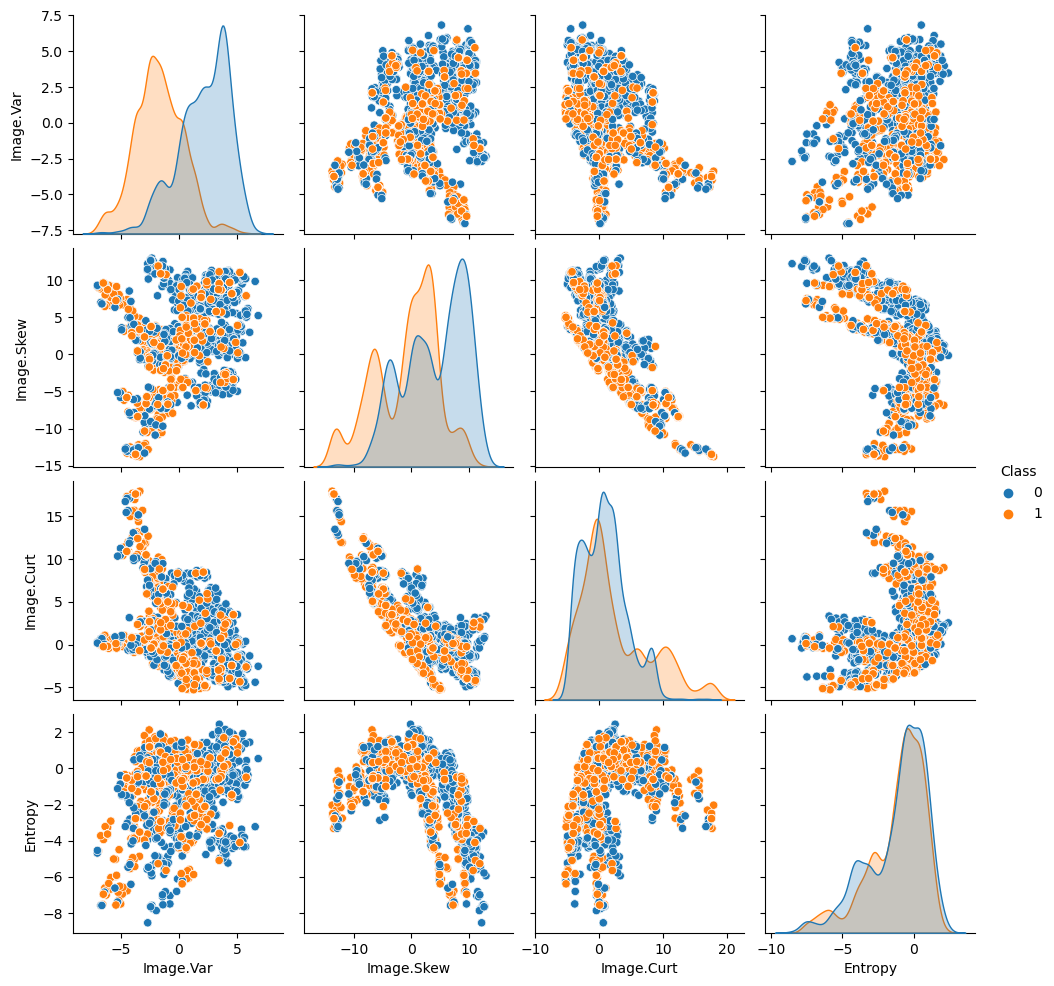

In [7]:
sns.pairplot(data,hue='Class')



### Standard Scaling



In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [10]:
scaler.fit(data.drop('Class',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [11]:
scaled_features = scaler.fit_transform(data.drop('Class',axis=1))

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.161519,1.176608,-0.950165,0.352595
1,1.482417,1.093139,-0.874920,-0.147432
2,1.246369,-0.715429,0.070833,0.625210
3,1.104234,1.319995,-1.209951,-1.197768
4,0.018480,-1.019527,0.642152,0.085708


## Train Test Split



In [13]:
X = df_feat

In [14]:
y = data['Class']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Tensorflow

In [17]:
import tensorflow as tf


In [18]:
df_feat.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [19]:
image_var = tf.feature_column.numeric_column("Image.Var")
image_skew = tf.feature_column.numeric_column('Image.Skew')
image_curt = tf.feature_column.numeric_column('Image.Curt')
entropy =tf.feature_column.numeric_column('Entropy')

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [20]:
feat_cols = [image_var,image_skew,image_curt,entropy]

Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:

In [21]:
classifier = tf.estimator.DNNClassifier(hidden_units=[50, 50, 50], n_classes=2,feature_columns=feat_cols)


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.

INFO:tensorflow:Using default config.

INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DELL\\AppData\\Local\\Temp\\tmpyuo14qwe', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '

In [22]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,shuffle=True)


Instructions for updating:
Use tf.keras instead.


In [23]:
classifier.train(input_fn=input_func,steps=500)

Instructions for updating:
Use tf.keras instead.

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.

INFO:tensorflow:Calling model_fn.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


## Model Evaluation

In [24]:
pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

** Use the predict method from the classifier model to create predictions from X_test **

In [25]:
note_predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DELL\AppData\Local\Temp\tmpyuo14qwe\model.ckpt-250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [26]:
note_predictions[0]

{'logits': array([-0.28171593], dtype=float32),
 'logistic': array([0.43003315], dtype=float32),
 'probabilities': array([0.56996685, 0.43003318], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object),
 'all_class_ids': array([0, 1]),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [27]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(confusion_matrix(y_test,final_preds))

[[869 245]
 [304 719]]


In [30]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1114
           1       0.75      0.70      0.72      1023

    accuracy                           0.74      2137
   macro avg       0.74      0.74      0.74      2137
weighted avg       0.74      0.74      0.74      2137

